In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from rasterio.crs import CRS
import rioxarray as rxr
import earthpy as et

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [2]:
# Get data from Boulder Open Data portal
boulder_roads = gpd.read_file(
    "https://opendata.arcgis.com/datasets/5388d74deeb8450e8b0a45a542488ec8_0.geojson"
)

boulder_roads.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
# Clip the boulder data to the extent of the study area aoo
aoi_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "clip-extent.shp"
)

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi_path)
# Reproject the crop extent data to match the roads layer.
crop_extent_wgs84 = crop_extent.to_crs(boulder_roads.crs)

# Clip the buildings and roads to the extent of the study area using geopandas
roads_clip = gpd.clip(boulder_roads, crop_extent_wgs84)


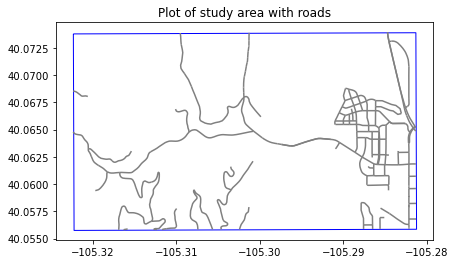

In [4]:
# Plot the clipped data
f, ax = plt.subplots(figsize=(10, 4))

crop_extent_wgs84.plot(
    ax=ax,
    edgecolor="blue",
    color="white"
)

roads_clip.plot(
    ax=ax,
    color="grey"
)
ax.set(title="Plot of study area with roads")
plt.show()


In [5]:
# Open up a DTM
lidar_dem_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM.tif"
)

lidar_dem = rxr.open_rasterio(
    lidar_dem_path,
    masked=True
).squeeze()
# CHeck the CRS
lidar_dem.rio.crs


CRS.from_epsg(32613)

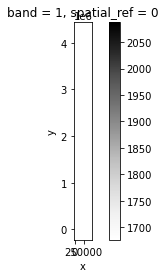

In [6]:
# When you try to overlay the building footprints the data don't line up
f, ax = plt.subplots()
lidar_dem.plot.imshow(
    ax=ax,
    cmap='Greys'
)
roads_clip.plot(ax=ax)

plt.show()


In [7]:
# Reproject the data using the crs from the roads layer
lidar_dem_wgs84 = lidar_dem.rio.reproject(roads_clip.crs)
lidar_dem_wgs84.rio.crs

CRS.from_epsg(4326)

In [8]:
# Reproject the data to another crs - 4326?

# Create a rasterio crs object for wgs 84 crs - lat / lon
crs_wgs84 = CRS.from_string('EPSG:4326')

# Reproject the data using the crs object
lidar_dem_wgs84_2 = lidar_dem.rio.reproject(crs_wgs84)
lidar_dem_wgs84_2.rio.crs

CRS.from_epsg(4326)

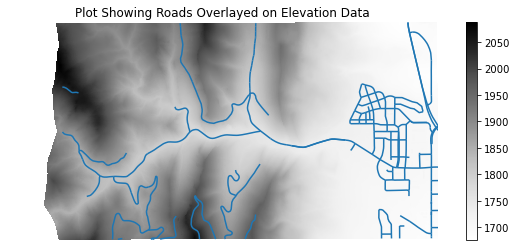

In [9]:
# Plot your newly converted data
f, ax = plt.subplots(figsize=(10, 4))

lidar_dem_wgs84.plot.imshow(ax=ax, cmap='Greys')
roads_clip.plot(ax=ax)
ax.set(title="Plot Showing Roads Overlayed on Elevation Data")
ax.set_axis_off()
plt.show()

In [10]:
# Open up a hillshade
lidar_dem_path_hill = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM_hill.tif"
)

lidar_dem_hill = rxr.open_rasterio(
    lidar_dem_path_hill,
    masked=True
).squeeze()
# CHeck the CRS
lidar_dem_hill.rio.crs


CRS.from_epsg(32613)

In [11]:
# Reproject the data using the crs from the roads layer
lidar_dem_hill_wgs84 = lidar_dem_hill.rio.reproject(roads_clip.crs)
lidar_dem_hill_wgs84.rio.crs

CRS.from_epsg(4326)

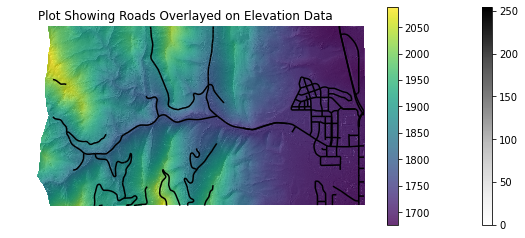

In [35]:
# Plot your newly converted data
f, ax = plt.subplots(figsize=(10, 4))

lidar_dem_hill_wgs84.plot.imshow(ax=ax, cmap="Greys")
lidar_dem_wgs84.plot.imshow(ax=ax, cmap='viridis', alpha=.8)
roads_clip.plot(ax=ax, color="black")
ax.set(title="Plot Showing Roads Overlayed on Elevation Data")
ax.set_axis_off()
plt.show()